In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import defaultdict, Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
Rating=pd.read_csv('Reviews.csv',encoding='latin-1')
Rating.head()

,Unnamed: 0,Ratings,Full_review
0,0,5,This is the best laptop in this range.I reciev...
1,1,5,Good product as used of now.... Everything is ...
2,2,5,AWESOME LAPTOP. It supports many high spec gam...
3,3,4,For that price... it's exceptionally good. Pla...
4,4,4,RAM upgrade is must do because the useable RAM...


In [4]:
#dropping the Unnamed: 0 column
Rating.drop('Unnamed: 0', axis =1, inplace = True)

In [5]:
print('shape = >',Rating.shape)

shape = > (40573, 2)


Observation:
    
    There are 40573 rows and 2 columns present in our dataset.

In [6]:
print('Rating counts','\n',Rating.Ratings.value_counts())

Rating counts 
 5    22169
4     7219
1     5839
3     3376
2     1970
Name: Ratings, dtype: int64


Observation:
    
    Maximum, 22169 number of ratings present is of 5 star and minimum, 1970 is of 2 star.

In [7]:
def plot_labels(Rating, title=None):
  ds_labels = Rating["Ratings"].value_counts(normalize=True)
  ds_labels.sort_index(inplace=True)
  plt.figure(figsize=(4,3))
  ax = ds_labels.plot(kind="bar")
  ax.set_xlabel("Stars")
  ax.set_ylabel("Ratio")
  if title is not None:
    plt.savefig(title + ".eps")
  plt.show()

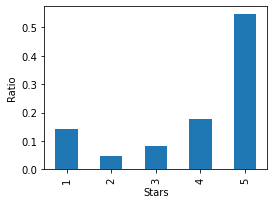

In [8]:
plot_labels(Rating, "stars")

We can observe that the dataset is imbalanced.

In [9]:
Rating['length']=Rating.Full_review.str.len()
Rating.head()

,Ratings,Full_review,length
0,5,This is the best laptop in this range.I reciev...,500
1,5,Good product as used of now.... Everything is ...,271
2,5,AWESOME LAPTOP. It supports many high spec gam...,96
3,4,For that price... it's exceptionally good. Pla...,342
4,4,RAM upgrade is must do because the useable RAM...,502


Here we create another column length based on the length of reviews.

In [10]:
Rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40573 entries, 0 to 40572
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ratings      40573 non-null  int64 
 1   Full_review  40573 non-null  object
 2   length       40573 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 951.1+ KB


In [11]:
Rating.isnull().sum()

Ratings        0
Full_review    0
length         0
dtype: int64

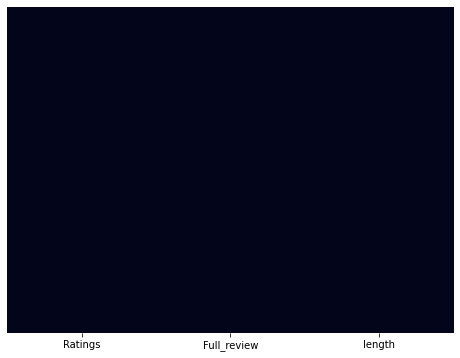

In [12]:
#Visualizing missing values if any through heatmap
plt.figure(figsize=(8,6))
sns.heatmap(Rating.isnull(),yticklabels=False,cbar=False)

Observation:
    
    Thus we confirm that there are no missing values present in our dataset.

In [13]:
#convert text to lowercase
Rating['Full_review']=Rating['Full_review'].str.lower()

In [14]:
Rating['Full_review']=Rating['Full_review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'£|\$', 'dollers')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

Rating['Full_review']=Rating['Full_review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [15]:
#remove punctuation
Rating['Full_review']=Rating['Full_review'].str.replace(r'[^\w\d\s]', ' ')

#replace whitespace between terms with a single space
Rating['Full_review']=Rating['Full_review'].str.replace(r'\s+', ' ')

#Remove leading and trailing whitespace
Rating['Full_review']=Rating['Full_review'].str.replace(r'^\s+|\s+?$', '')

In [16]:
Rating.head()

,Ratings,Full_review,length
0,5,this is the best laptop in this range i reciev...,500
1,5,good product as used of now everything is good...,271
2,5,awesome laptop it supports many high spec game...,96
3,4,for that price it s exceptionally good played ...,342
4,4,ram upgrade is must do because the useable ram...,502


In [17]:
#Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

Rating['Full_review'] = Rating['Full_review'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [18]:
Rating['clean_length'] = Rating.Full_review.str.len()

In [19]:
Rating.head()

,Ratings,Full_review,length,clean_length
0,5,best laptop range recieved late delivery due b...,500,337
1,5,good product used everything good also ssd slo...,271,150
2,5,awesome laptop supports many high spec games l...,96,84
3,4,price exceptionally good played far cry numbr ...,342,254
4,4,ram upgrade must useable ram numbrgb ryzen num...,502,393


In [20]:
print('original Review length', Rating.length.sum())
print('clean Review length', Rating.clean_length.sum())

original Review length 2462336
clean Review length 1746395


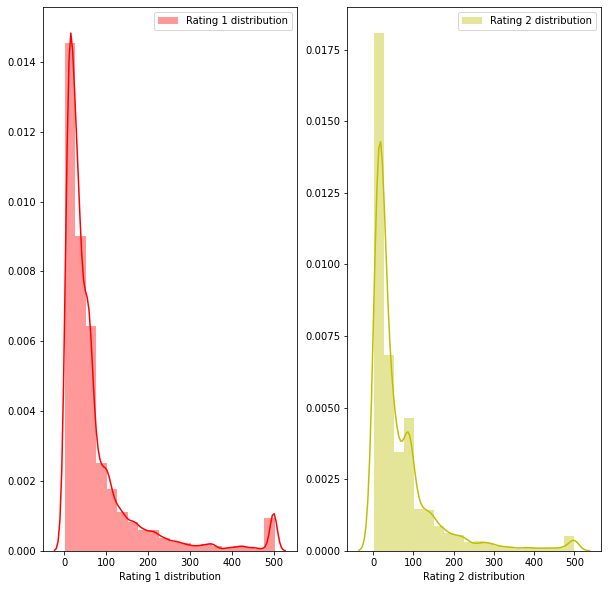

In [36]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==2]['length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

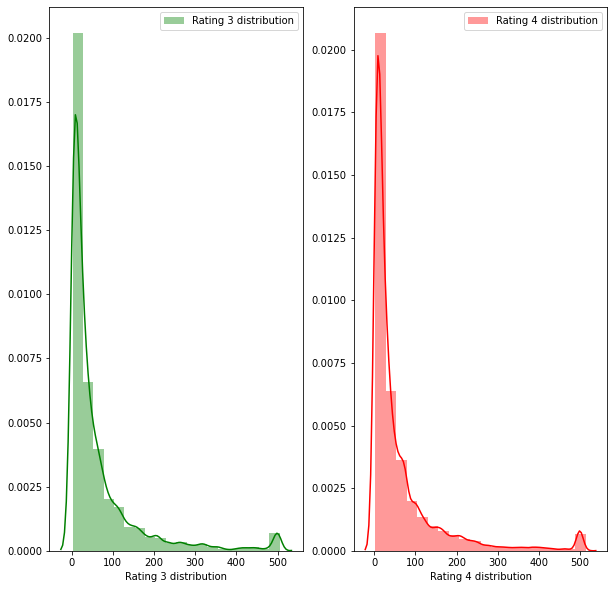

In [38]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

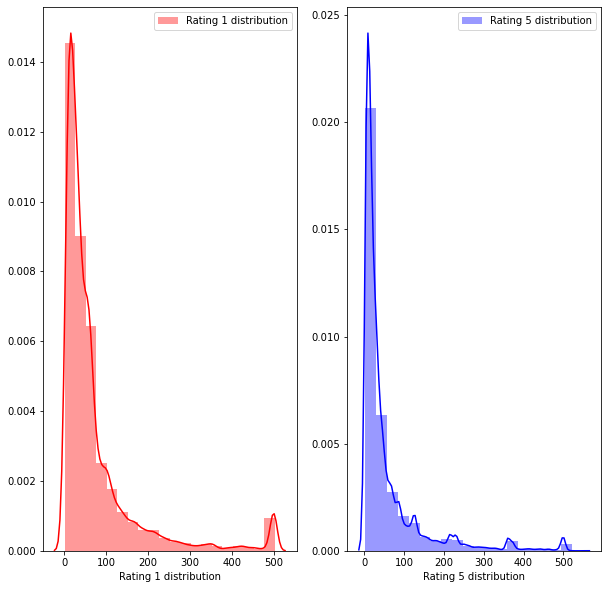

In [41]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==5]['length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

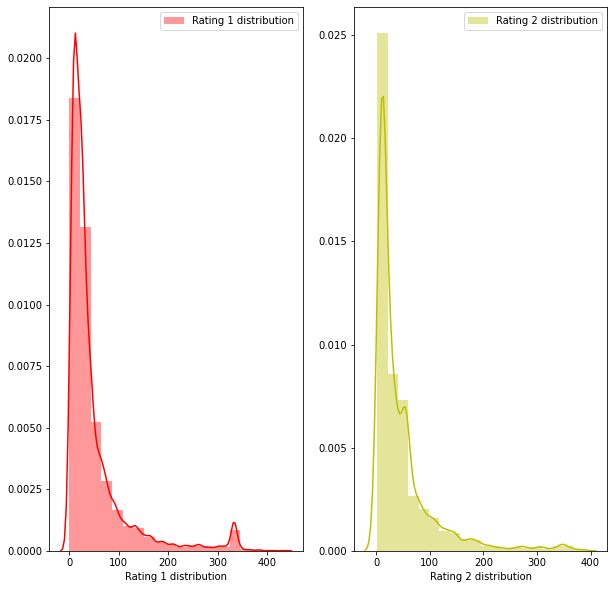

In [42]:
#message distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==2]['clean_length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

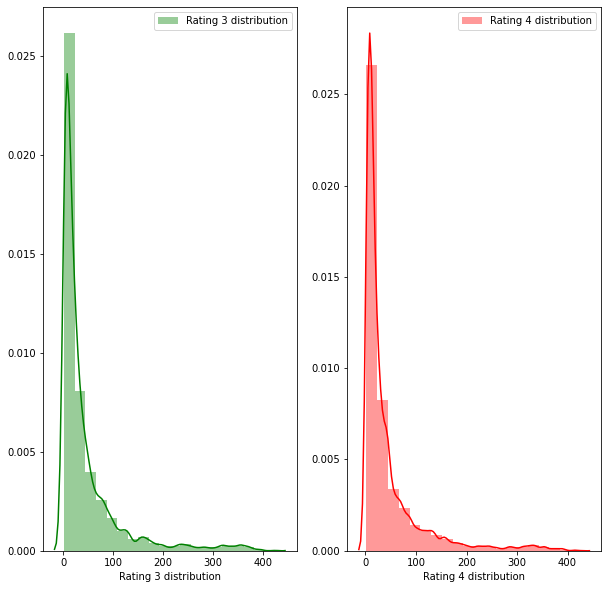

In [43]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['clean_length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['clean_length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

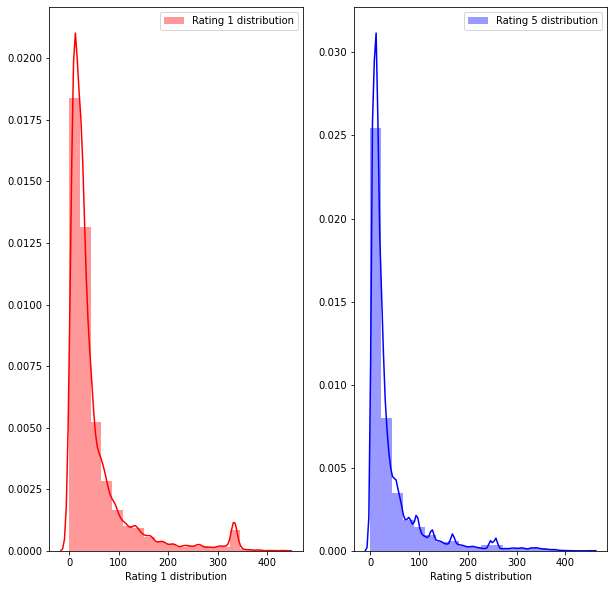

In [44]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==5]['clean_length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

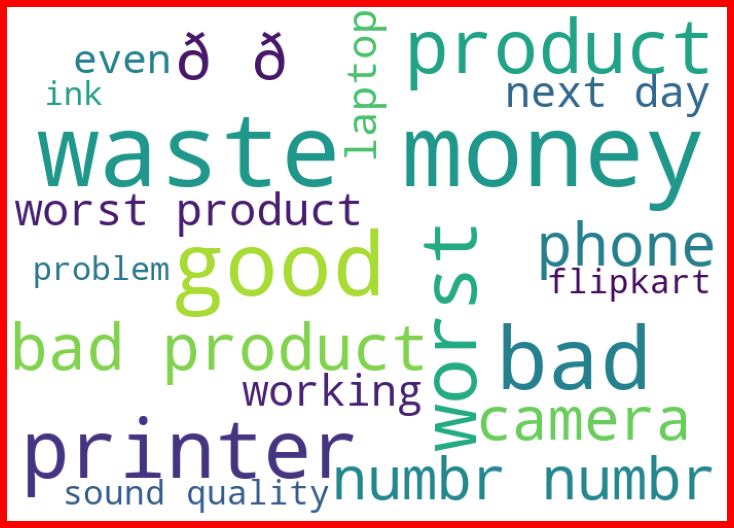

In [45]:
#getting sense of review Loud words in Rating 1
from wordcloud import WordCloud

Rating1=Rating['Full_review'][Rating['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

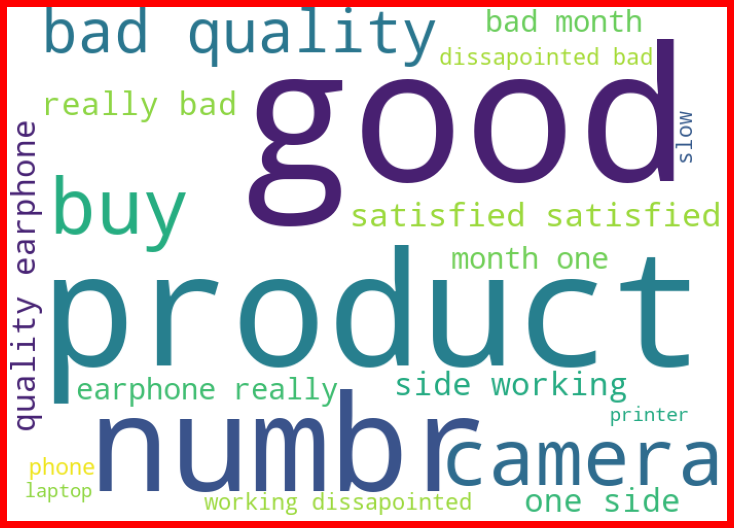

In [46]:
#getting sense of review Loud words in Rating 2

Rating2=Rating['Full_review'][Rating['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating2))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

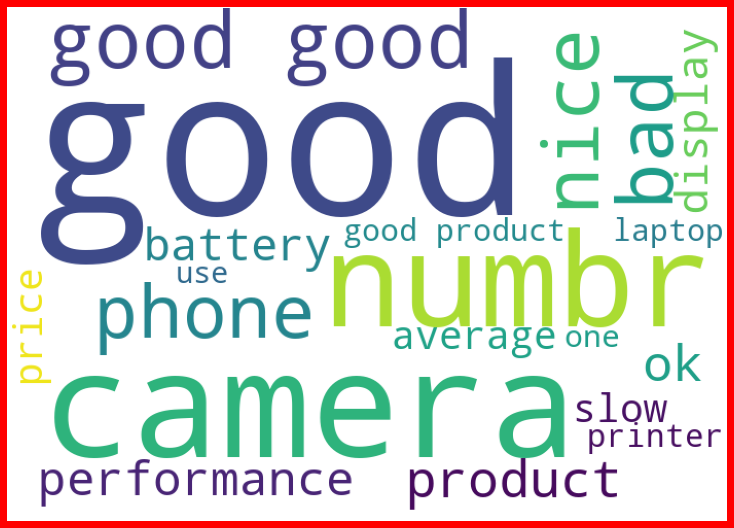

In [47]:
#getting sense of review Loud words in Rating 3

Rating3=Rating['Full_review'][Rating['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating3))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

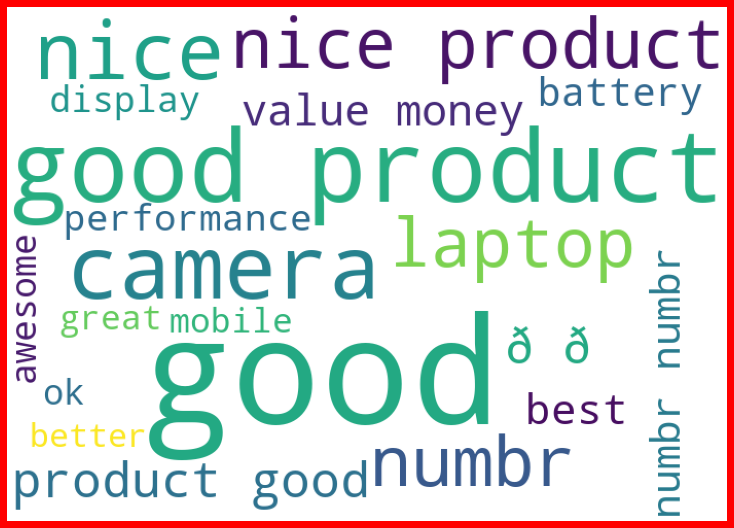

In [48]:
#getting sense of review Loud words in Rating 4

Rating4=Rating['Full_review'][Rating['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating4))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

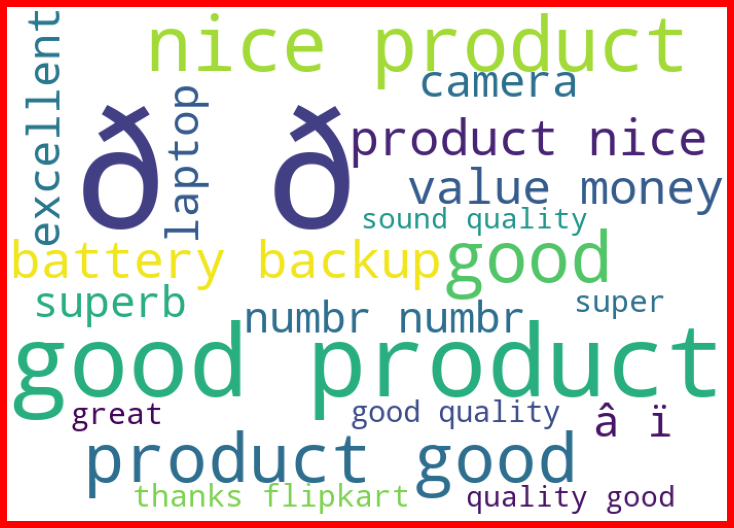

In [49]:
#getting sense of review Loud words in Rating 5

Rating5=Rating['Full_review'][Rating['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating5))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec=TfidfVectorizer()
feature1=tf_vec.fit_transform(Rating['Full_review'])

In [51]:
x=feature1

In [52]:
y=Rating['Ratings']

In [53]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=9)

In [59]:
#handling imbalanced data through smote technique
from imblearn.combine import SMOTETomek
from collections import Counter
os=SMOTETomek(sampling_strategy = {1: 20000, 2: 20000, 3: 20000, 4: 20000, 5: 20000})
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 17791, 4: 5781, 1: 4630, 3: 2698, 2: 1558})
The number of classes after fit Counter({5: 19963, 1: 19897, 4: 19894, 3: 19868, 2: 19858})


In [62]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [63]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
XGB=XGBClassifier()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

In [64]:
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('XGBClassifier', XGB))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.4277264325323475


Cross_Val_Score =  0.5783170767766814


classification_report
               precision    recall  f1-score   support

           1       0.52      0.68      0.59      1209
           2       0.27      0.30      0.29       412
           3       0.16      0.23      0.19       678
           4       0.25      0.59      0.36      1438
           5       0.85      0.35      0.49      4378

    accuracy                           0.43      8115
   macro avg       0.41      0.43      0.38      8115
weighted avg       0.61      0.43      0.45      8115



[[ 817  136   76  153   27]
 [ 158  123   38   78   15]
 [ 138   40  157  294   49]
 [ 142   53  216  846  181]
 [ 304   96  502 1948 1528]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeCl

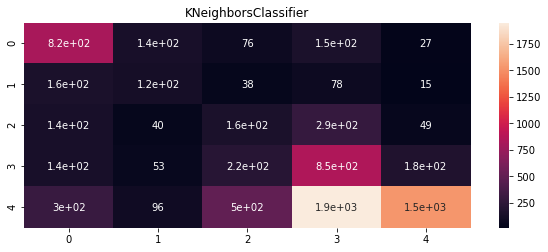

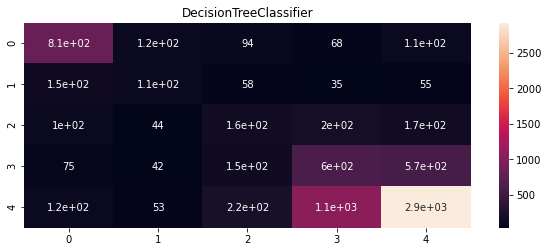

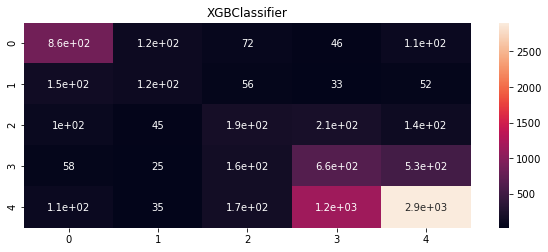

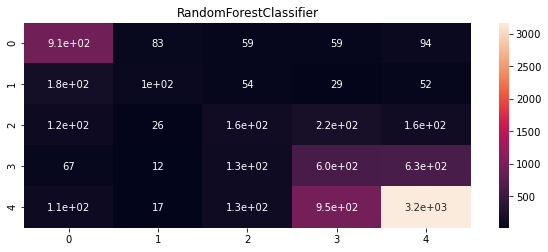

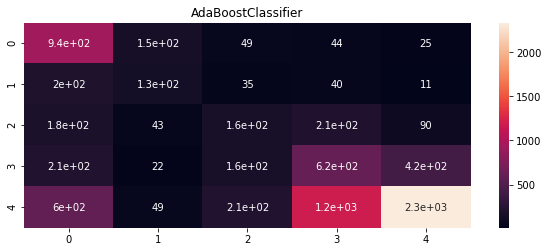

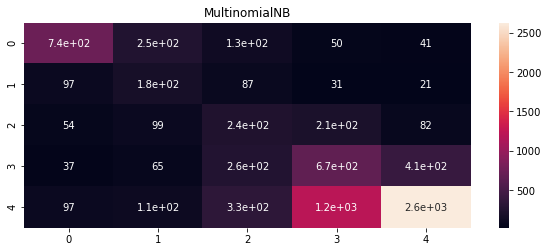

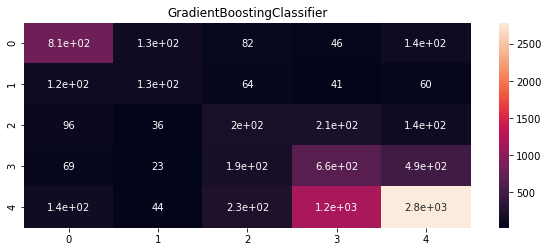

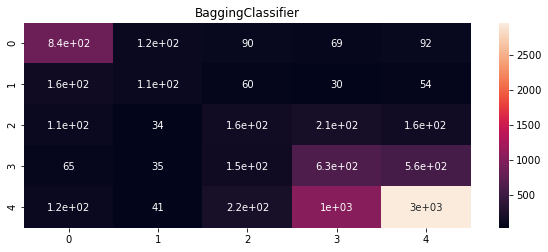

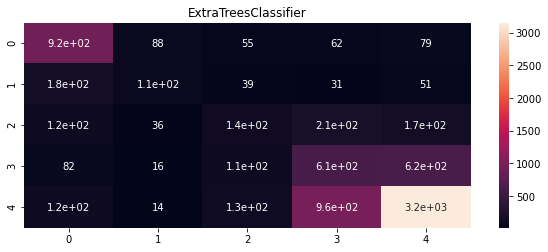

In [66]:
Model= []
score= []
cvs=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_ns,y_train_ns)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

In [67]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,42.772643,57.831708
1,DecisionTreeClassifier,56.759088,57.940008
2,XGBClassifier,58.311768,63.480543
3,RandomForestClassifier,60.973506,63.870033
4,AdaBoostClassifier,51.608133,62.243298
5,MultinomialNB,54.799754,62.524411
6,GradientBoostingClassifier,56.487985,63.231706
7,BaggingClassifier,57.966728,61.402893
8,ExtraTreesClassifier,60.862600,63.751793


## Using gridsearch cv to find the best parameters in random forest

In [72]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth': [80, 90, 100], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]}
rfc=RandomForestClassifier()

clf=GridSearchCV(rfc,parameters,cv=5,n_jobs=-1)
clf.fit(x_train_ns,y_train_ns)
print(clf.best_params_)

{'max_depth': 100, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}


In [74]:
#RandomForesetClassifier with best parameters

rfc=RandomForestClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=1000)
rfc.fit(x_train_ns,y_train_ns)
rfc.score(x_train_ns,y_train_ns)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.5897720271102895
[[ 869  135   75   44   86]
 [ 156  125   62   28   41]
 [  86   47  205  209  131]
 [  62   32  187  640  517]
 [ 107   53  200 1071 2947]]
              precision    recall  f1-score   support

           1       0.68      0.72      0.70      1209
           2       0.32      0.30      0.31       412
           3       0.28      0.30      0.29       678
           4       0.32      0.45      0.37      1438
           5       0.79      0.67      0.73      4378

    accuracy                           0.59      8115
   macro avg       0.48      0.49      0.48      8115
weighted avg       0.62      0.59      0.60      8115



In [75]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,42.772643,57.831708
1,DecisionTreeClassifier,56.759088,57.940008
2,XGBClassifier,58.311768,63.480543
3,RandomForestClassifier,60.973506,63.870033
4,AdaBoostClassifier,51.608133,62.243298
5,MultinomialNB,54.799754,62.524411
6,GradientBoostingClassifier,56.487985,63.231706
7,BaggingClassifier,57.966728,61.402893
8,ExtraTreesClassifier,60.862600,63.751793


## Random forest classifier is giving us best results so we save it as our final model.

In [76]:
#saving our model

import joblib
joblib.dump(RF,'Ratings_prediction.csv')

['Ratings_prediction.csv']

In [77]:
model=joblib.load('Ratings_prediction.csv')

In [78]:
#Testing our model
import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[5 1 4 4 5 3 4 1 1 5 5 1 5 5 4 5 1 5 5 1 5 5 5 5 5 5 5 4 5 4 1 5 3 5 5 5 5
 5 5 5 5 5 3 5 5 1 5 5 5 5 5 3 4 4 5 3 1 3 5 5 5 3 5 4 4 5 3 4 4 5 4 4 4 5
 5 4 5 5 4 1 5 2 5 2 4 5 5 1 5 4 2 5 5 5 4 5 1 5 4 4 5 5 5 5 5 5 5 1 3 5 5
 4 5 1 5 5 3 2 5 4 5 4 3 4 5 5 4 1 5 5 5 3 5 3 4 5 1 5 4 4 1 5 1 5 5 4 4 2
 1 1 5 4 5 4 5 1 3 5 4 4 1 5 2 1 2 5 5 5 4 1 5 5 1 5 5 5 5 5 5 5 1 4 2 5 4
 5 4 4 4 1 5 4 5 4 4 5 5 1 5 1 5 5 1 4 5 5 4 1 5 5 5 5 1 4 5 4 4 1 1 5 4 5
 5 3 5 5 5 1 5 5 4 5 4 3 3 1 5 1 5 5 4 3 5 5 2 5 5 5 3 5 1 1 5 5 5 5 5 1 4
 1 5 3 5 5 1 5 5 1 5 3 4 1 5 4 5 5 5 4 5 4 4 5 5 4 4 5 5 2 4 4 1 2 5 5 1 1
 4 4 5 4 5 5 1 4 4 1 5 1 5 5 5 5 4 3 5 1 5 5 5 5 4 4 5 5 5 5 4 4 4 2 5 2 1
 1 1 4 5 4 2 4 5 5 4 1 1 1 4 5 1 5 5 5 3 5 1 3 5 5 5 5 5 5 5 5 5 4 5 2 4 4
 3 4 1 4 5 5 5 2 1 1 4 5 5 4 5 5 1 5 4 3 1 5 1 5 3 5 4 5 5 1 1 5 3 5 5 1 1
 2 4 5 3 5 5 1 5 1 5 3 3 5 1 4 4 4 3 2 1 3 5 5 5 3 5 5 4 5 5 5 5 4 5 5 5 1
 5 5 4 4 5 5 5 5 5 4 5 1 4 1 5 5 5 5 1 1 5 4 4 5 5 5 1 4 4 4 1 5 5 5 5 3 4
 4 5 1 5 4 4 4 5 4 5 4 4 